In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Terrorist_attack=pd.read_excel ('Suicide_bombing_attacks_transformed (1).xlsx')

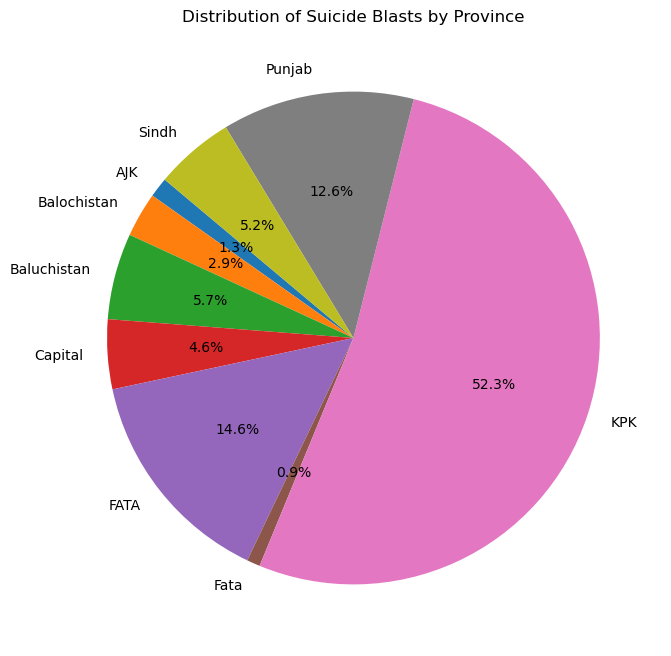

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Sum the number of suicide blasts for each province
province_counts = Terrorist_attack.groupby('Province')['No. of Suicide Blasts'].sum().reset_index()


# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(province_counts['No. of Suicide Blasts'], labels=province_counts['Province'], autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Distribution of Suicide Blasts by Province')

# Show the plot
plt.show()

In [6]:
import folium

In [9]:
m = folium.Map(location=[Terrorist_attack['Latitude'].median(), Terrorist_attack['Longitude'].median()], zoom_start=6)

# Group by latitude and longitude, and count the number of suicide blasts
location_counts = Terrorist_attack.groupby(['Latitude', 'Longitude']).size().reset_index(name='No_of_Suicide_Blasts')

# Add circle markers to the map with smaller markers
for _, row in location_counts.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['No_of_Suicide_Blasts'] * 0.5,  # Adjusted smaller multiplier
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

# Display the map
m.save('suicide_blasts_map.html')
m

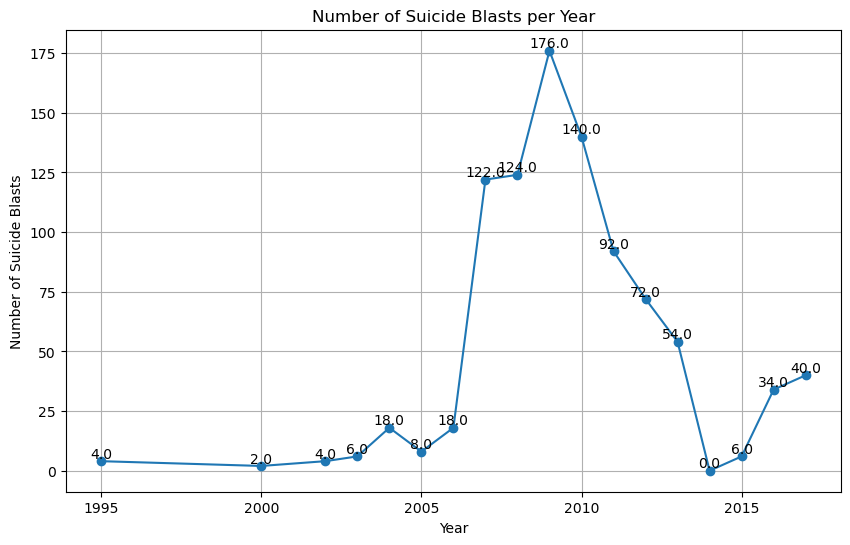

In [18]:
import pandas as pd

# Assuming your DataFrame has a column 'No_of_Suicide_Blasts'
yearly_counts = Terrorist_attack.groupby('Year')['No. of Suicide Blasts'].sum().reset_index()



# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['Year'], yearly_counts['No. of Suicide Blasts'], marker='o')

for i in range(len(yearly_counts)):
    plt.text(yearly_counts['Year'][i], yearly_counts['No. of Suicide Blasts'][i], 
             str(yearly_counts['No. of Suicide Blasts'][i]), 
             ha='center', va='bottom')


# Adding titles and labels
plt.title('Number of Suicide Blasts per Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicide Blasts')
plt.grid(True)

# Show the plot
plt.show()



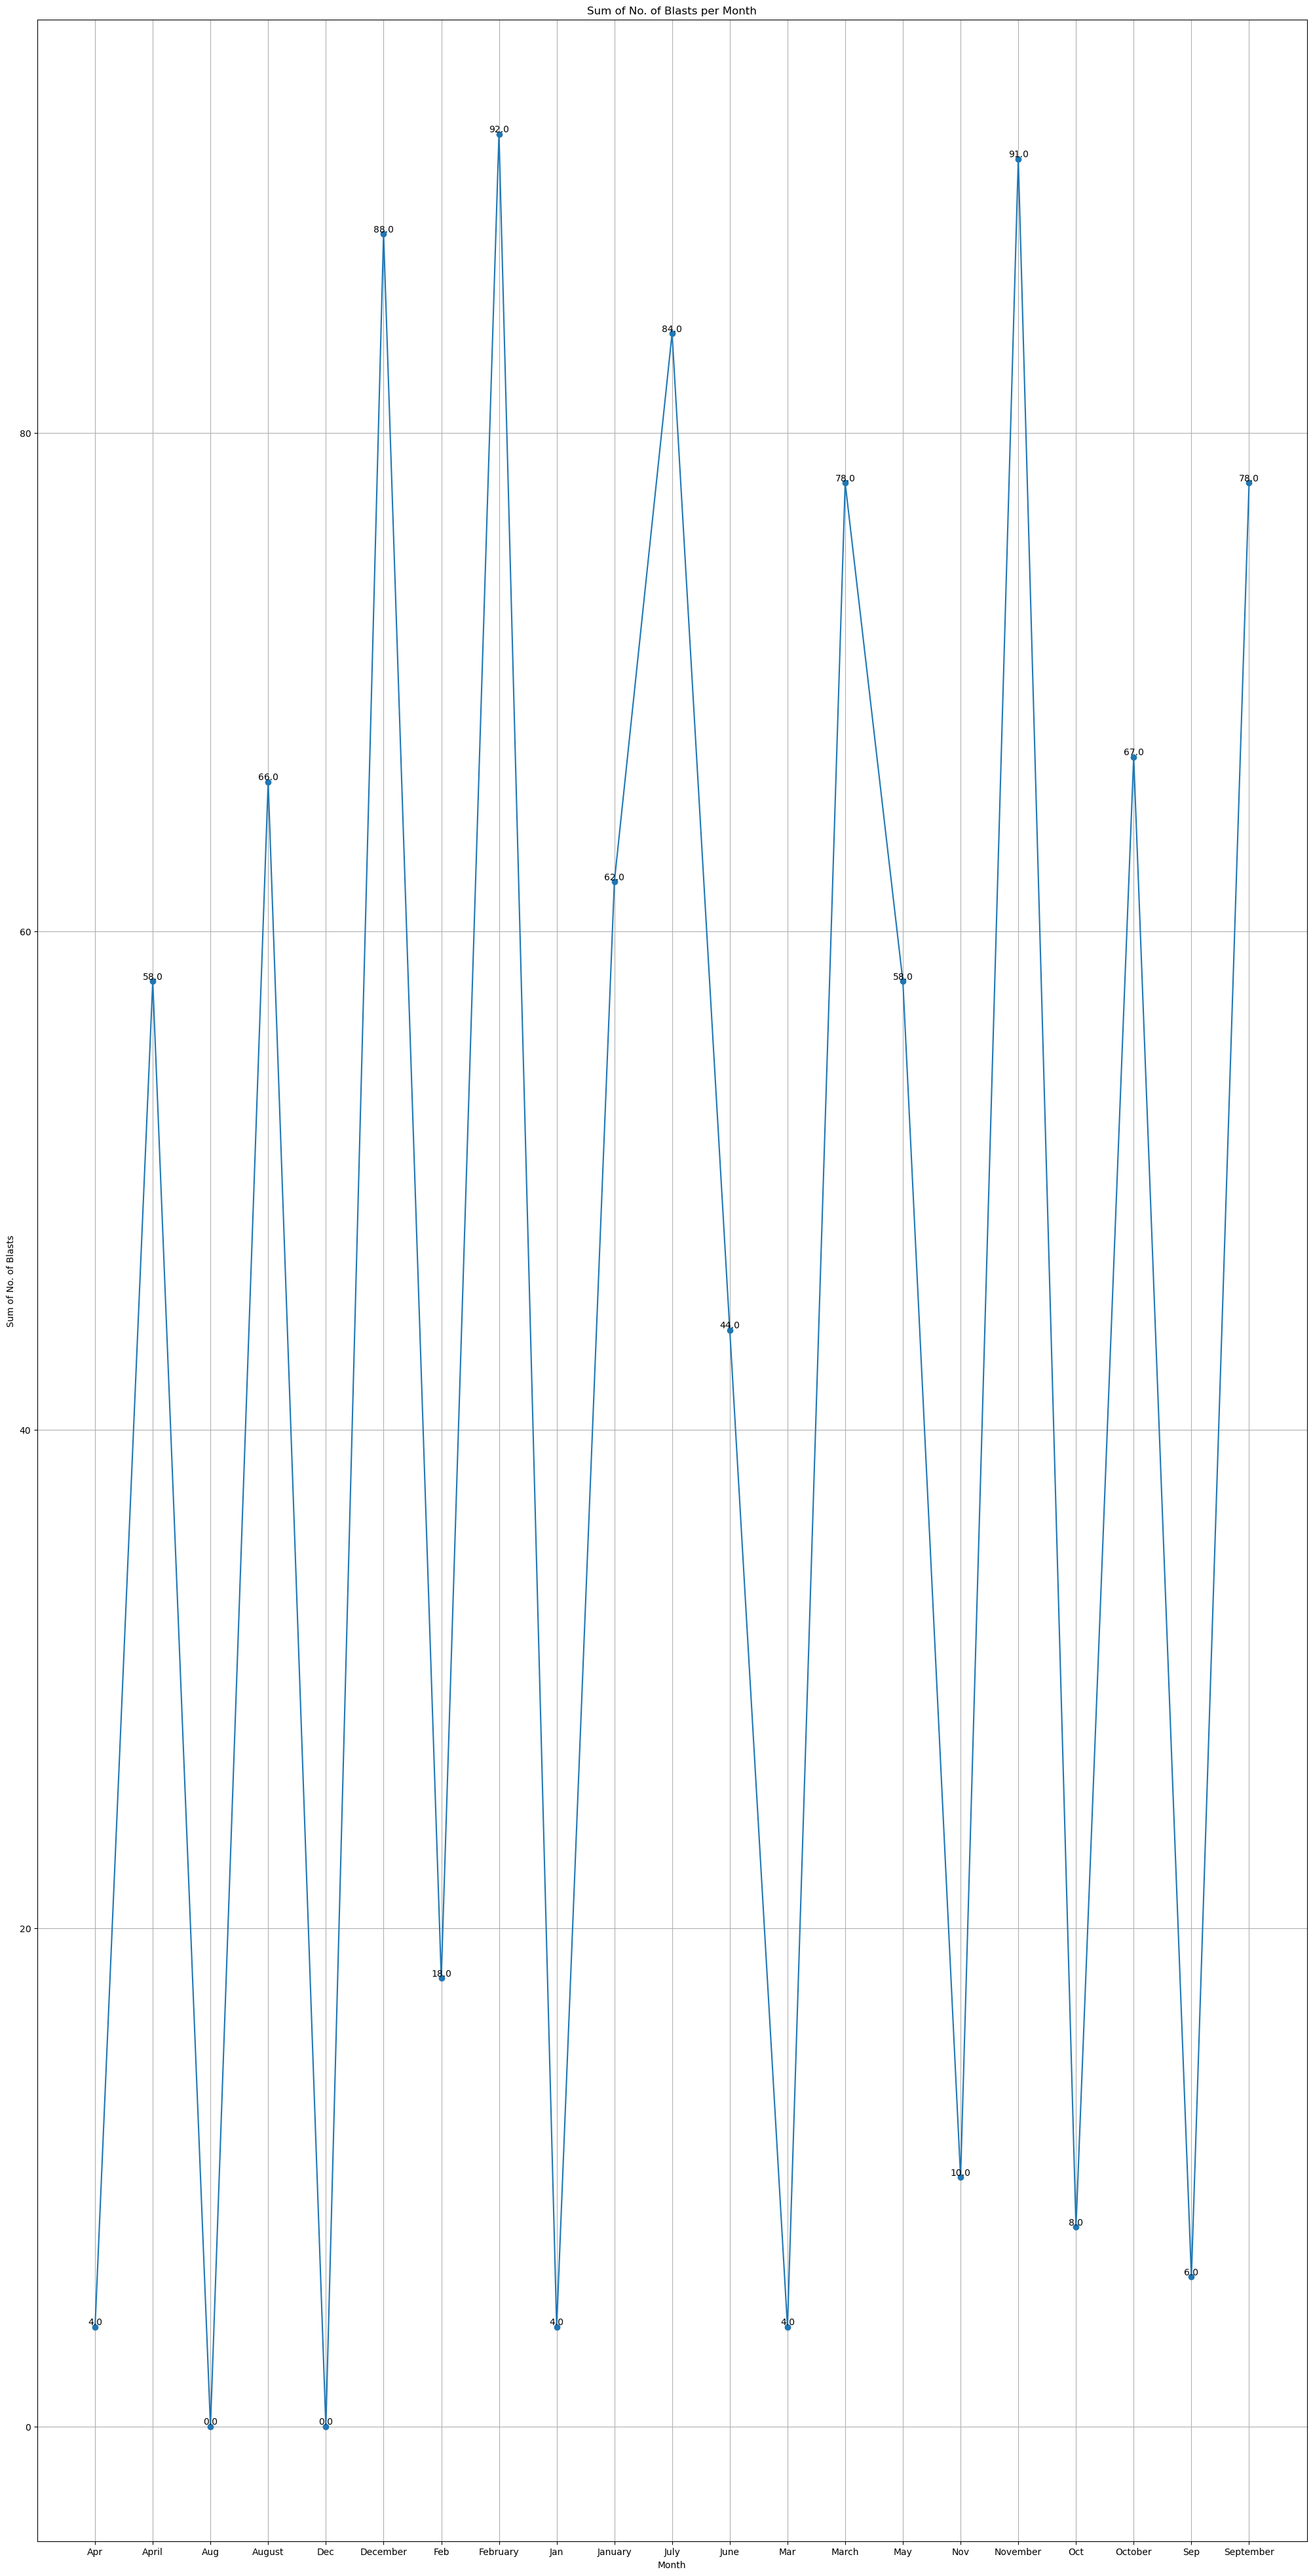

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by month and sum the number of blasts
monthly_counts = Terrorist_attack.groupby('Month')['No. of Suicide Blasts'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(25, 50))
plt.plot(monthly_counts['Month'], monthly_counts['No. of Suicide Blasts'], marker='o')

# Adding titles and labels
plt.title('Sum of No. of Blasts per Month')
plt.xlabel('Month')
plt.ylabel('Sum of No. of Blasts')
plt.xticks(monthly_counts['Month'])  # Ensure all months are shown on x-axis
plt.grid(True)

# Adding data labels
for i in range(len(monthly_counts)):
    plt.text(monthly_counts['Month'][i], monthly_counts['No. of Suicide Blasts'][i], 
             str(monthly_counts['No. of Suicide Blasts'][i]), 
             ha='center', va='bottom')

# Show the plot
plt.show()

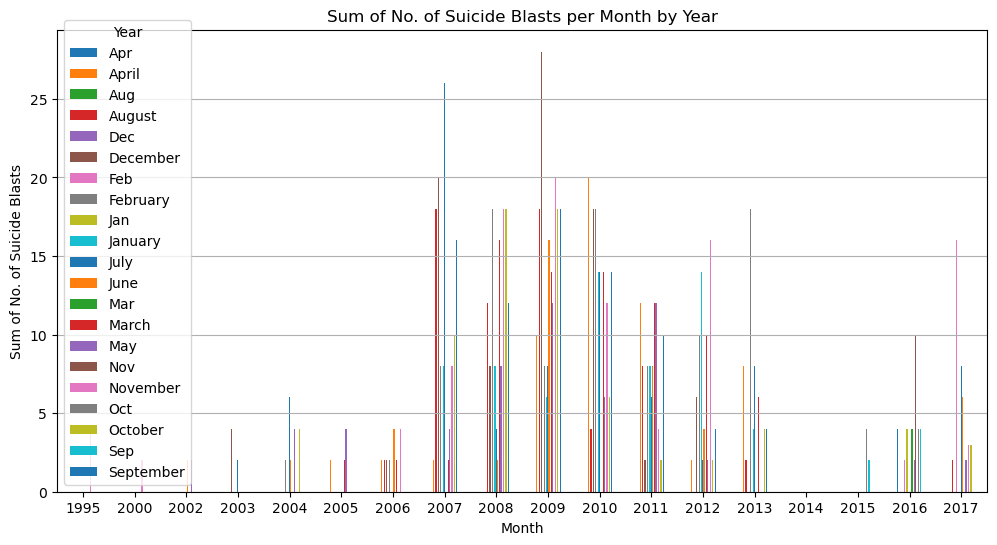

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and Month, then sum the number of suicide blasts
monthly_yearly_counts = Terrorist_attack.groupby(['Year', 'Month'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the bar chart
monthly_yearly_counts.plot(kind='bar', figsize=(12, 6))

# Adding titles and labels
plt.title('Sum of No. of Suicide Blasts per Month by Year')
plt.xlabel('Month')
plt.ylabel('Sum of No. of Suicide Blasts')
plt.xticks(rotation=0)  # Rotate month labels for better readability
plt.legend(title='Year')
plt.grid(axis='y')

# Show the plot
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

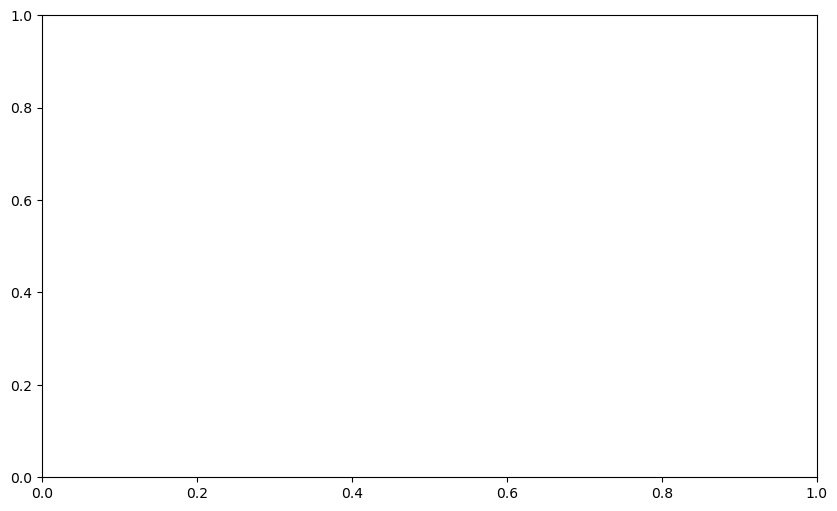

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# Assuming 'Terrorist_attack' has columns 'Islamic_Month' and 'No. of Suicide Blasts'
# Terrorist_attack = pd.DataFrame(...)

# Group by Islamic Month and sum the number of suicide blasts
islamic_monthly_counts = Terrorist_attack.groupby('Islamic Month')['No. of Suicide Blasts'].sum().reset_index()

# Ensure Islamic_Month is treated as a categorical variable and sort by month order
islamic_months_order = [
    'Muharram', 
    'Safar', 
    'Rabi al-Awwal', 
    'Rabi al-Thani', 
    'Jumaada al-Awwal', 
    'Jumaada al-Thani', 
    'Rajab', 
    'Sha\'ban', 
    'Ramadan', 
    'Shawwal', 
    'Dhu al-Qi\'dah', 
    'Dhu al-Hijjah'
]

islamic_monthly_counts['Islamic Month'] = pd.Categorical(islamic_monthly_counts['Islamic Month'], 
                                                          categories=islamic_months_order, 
                                                          ordered=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(islamic_monthly_counts['Islamic Month'], islamic_monthly_counts['No. of Suicide Blasts'], color='crimson')

# Adding titles and labels
plt.title('Sum of No. of Suicide Blasts by Islamic Month')
plt.xlabel('Islamic Month')
plt.ylabel('Sum of No. of Suicide Blasts')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.grid(axis='y')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, 
             f'{int(yval)}', ha='center', va='bottom')  # Convert yval to int for display

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

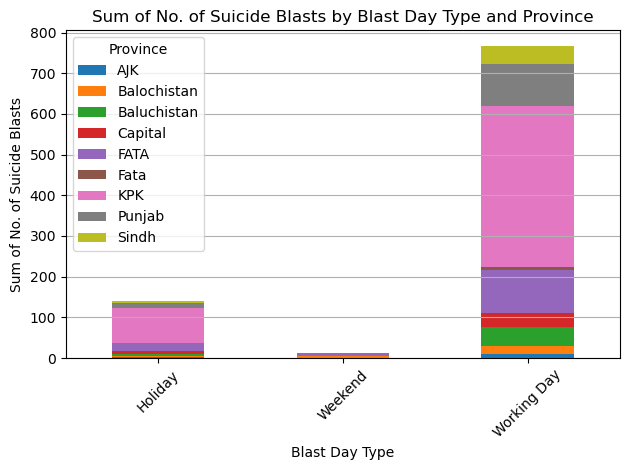

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# Assuming 'Terrorist_attack' has columns 'Blast Day Type', 'No. of Suicide Blasts', and 'Province'
# Terrorist_attack = pd.DataFrame(...)

# Group by Blast Day Type and Province, then sum the number of suicide blasts
blast_day_province_counts = Terrorist_attack.groupby(['Blast Day Type', 'Province'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
blast_day_province_counts.plot(kind='bar', stacked=True)

# Adding titles and labels
plt.title('Sum of No. of Suicide Blasts by Blast Day Type and Province')
plt.xlabel('Blast Day Type')
plt.ylabel('Sum of No. of Suicide Blasts')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y')

# Adding legend
plt.legend(title='Province')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

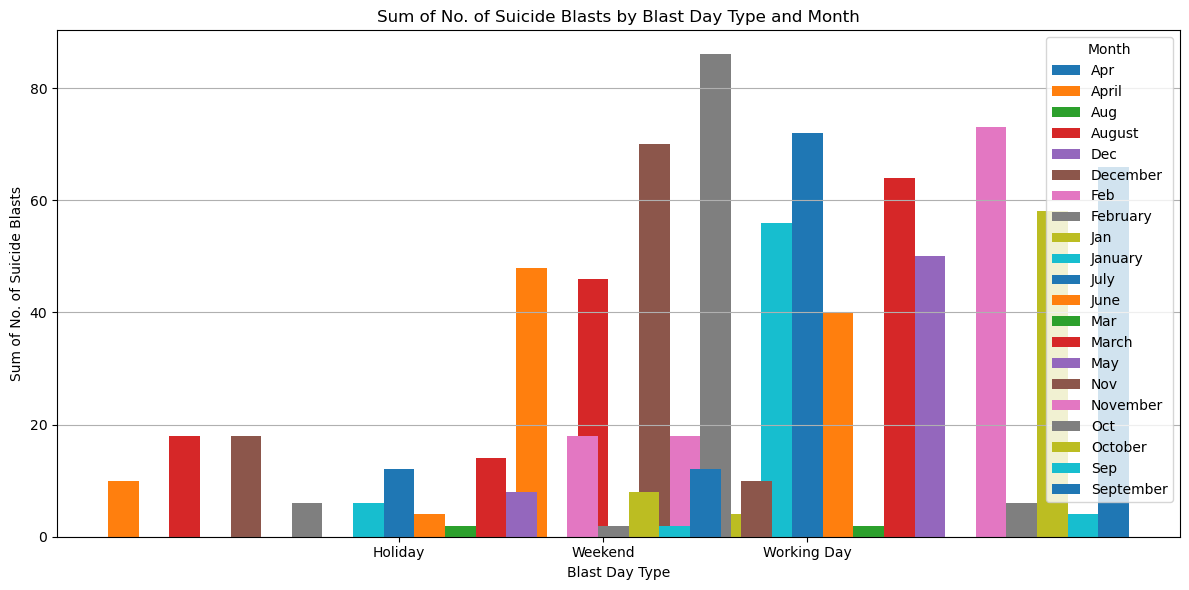

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame (replace this with your actual DataFrame)
# Assuming 'Terrorist_attack' has columns 'Blast Day Type', 'No. of Suicide Blasts', and 'Month'
# Terrorist_attack = pd.DataFrame(...)

# Group by Blast Day Type and Month, then sum the number of suicide blasts
blast_day_month_counts = Terrorist_attack.groupby(['Blast Day Type', 'Month'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the clustered bar chart
bar_width = 0.15  # Width of each bar
x = np.arange(len(blast_day_month_counts.index))  # X locations for the groups

plt.figure(figsize=(12, 6))

# Create a bar for each month
for i, month in enumerate(blast_day_month_counts.columns):
    plt.bar(x + i * bar_width, blast_day_month_counts[month], width=bar_width, label=month)

# Adding titles and labels
plt.title('Sum of No. of Suicide Blasts by Blast Day Type and Month')
plt.xlabel('Blast Day Type')
plt.ylabel('Sum of No. of Suicide Blasts')
plt.xticks(x + bar_width * (len(blast_day_month_counts.columns) - 1) / 2, blast_day_month_counts.index)  # Center the x-ticks
plt.grid(axis='y')

# Adding legend
plt.legend(title='Month')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

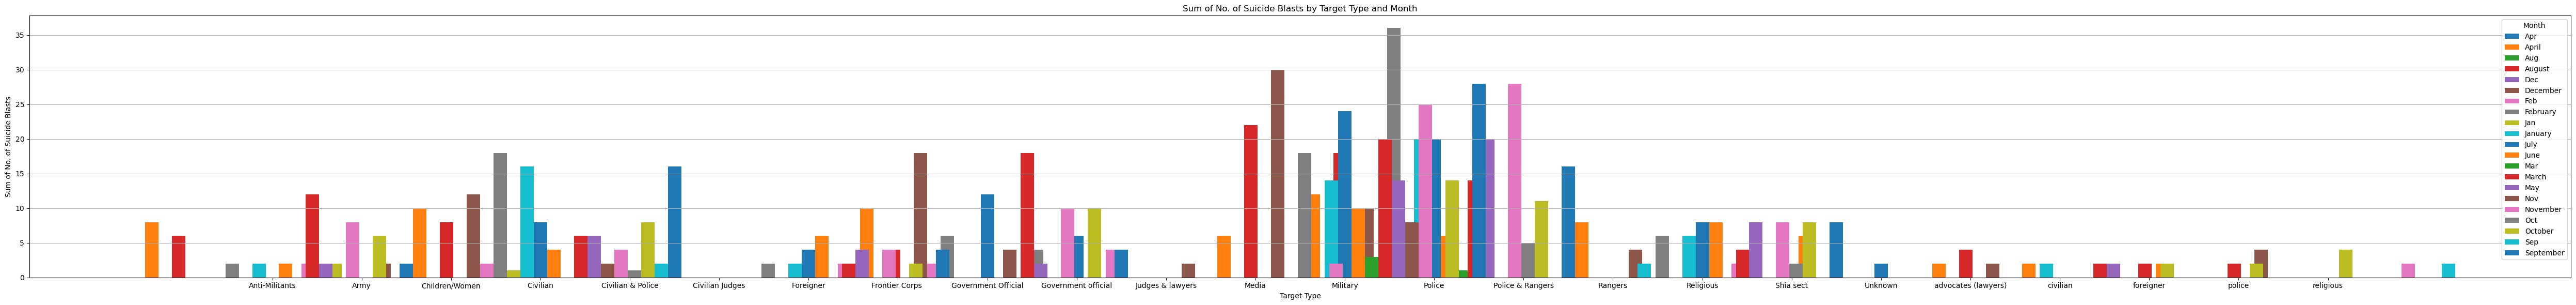

In [38]:
# Sample DataFrame (replace this with your actual DataFrame)
# Assuming 'Terrorist_attack' has columns 'Target Type', 'No. of Suicide Blasts', and 'Month'
# Terrorist_attack = pd.DataFrame(...)

# Group by Target Type and Month, then sum the number of suicide blasts
target_month_counts = Terrorist_attack.groupby(['Target Type', 'Month'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the clustered bar chart
bar_width = 0.15  # Width of each bar
x = np.arange(len(target_month_counts.index))  # X locations for the groups

plt.figure(figsize=(50, 6))

# Create a bar for each month
for i, month in enumerate(target_month_counts.columns):
    plt.bar(x + i * bar_width, target_month_counts[month], width=bar_width, label=month)

# Adding titles and labels
plt.title('Sum of No. of Suicide Blasts by Target Type and Month')
plt.xlabel('Target Type')
plt.ylabel('Sum of No. of Suicide Blasts')
plt.xticks(x + bar_width * (len(target_month_counts.columns) - 1) / 2, target_month_counts.index)  # Center the x-ticks
plt.grid(axis='y')

# Adding legend
plt.legend(title='Month')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

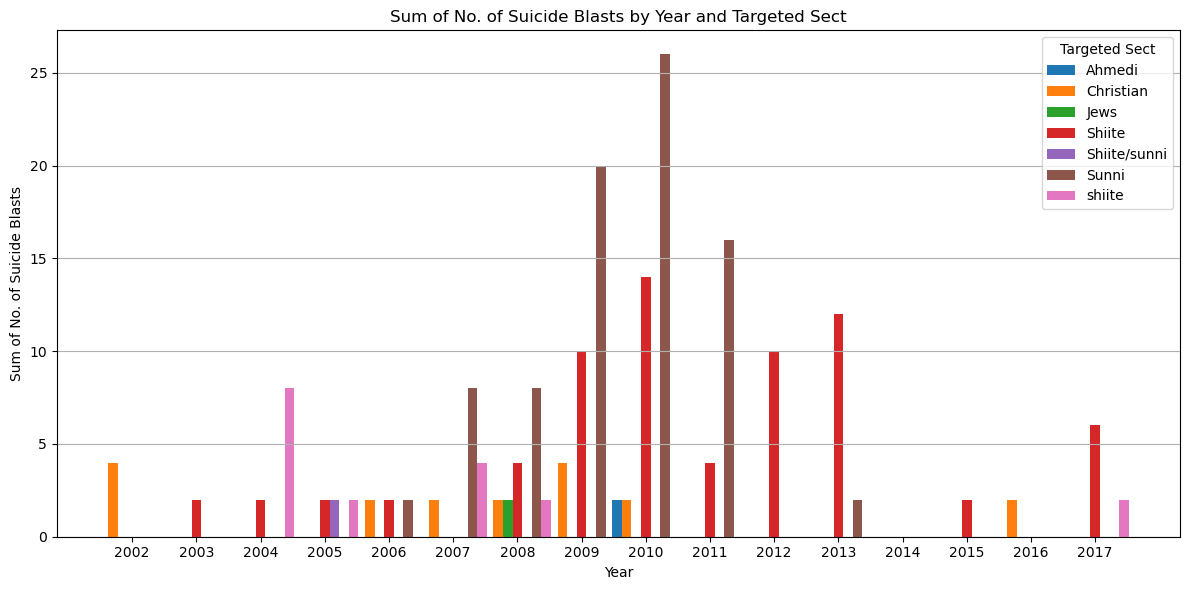

In [40]:
# Group by Year and Targeted Sect, then sum the number of suicide blasts
year_sect_counts = Terrorist_attack.groupby(['Year', 'Targeted Sect if any'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the clustered bar chart
bar_width = 0.15  # Width of each bar
x = np.arange(len(year_sect_counts.index))  # X locations for the groups

plt.figure(figsize=(12, 6))

# Create a bar for each targeted sect
for i, sect in enumerate(year_sect_counts.columns):
    plt.bar(x + i * bar_width, year_sect_counts[sect], width=bar_width, label=sect)

# Adding titles and labels
plt.title('Sum of No. of Suicide Blasts by Year and Targeted Sect')
plt.xlabel('Year')
plt.ylabel('Sum of No. of Suicide Blasts')
plt.xticks(x + bar_width * (len(year_sect_counts.columns) - 1) / 2, year_sect_counts.index)  # Center the x-ticks
plt.grid(axis='y')

# Adding legend
plt.legend(title='Targeted Sect')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

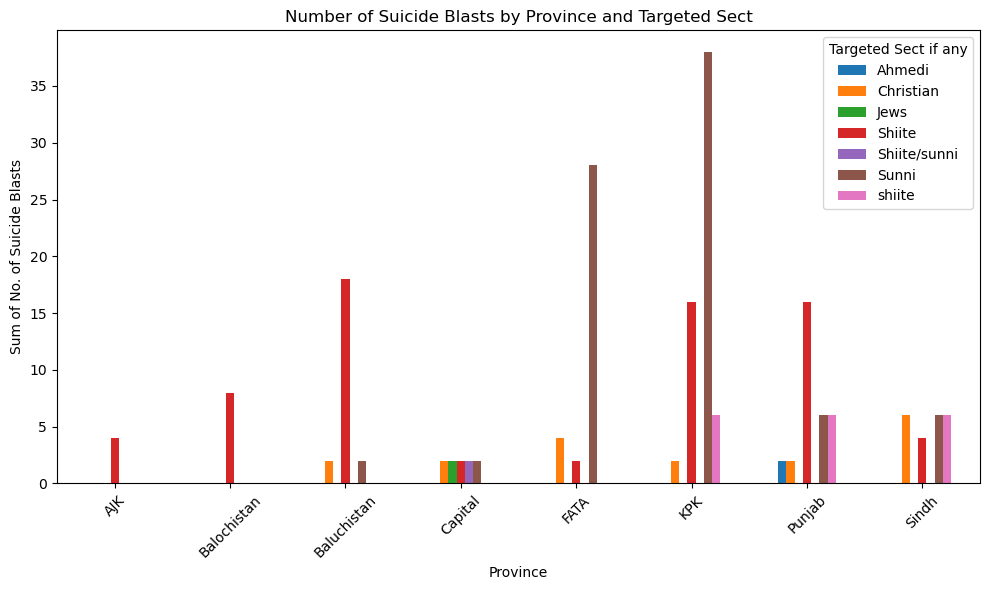

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is already loaded as Terrorist_attack

# Grouping by Province and Targeted Sect, summing No. of Suicide Blasts
df_grouped = Terrorist_attack.groupby(['Province', 'Targeted Sect if any'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

# Setting chart title and labels
plt.title('Number of Suicide Blasts by Province and Targeted Sect')
plt.xlabel('Province')
plt.ylabel('Sum of No. of Suicide Blasts')

# Showing the legend and plot
plt.legend(title='Targeted Sect if any')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

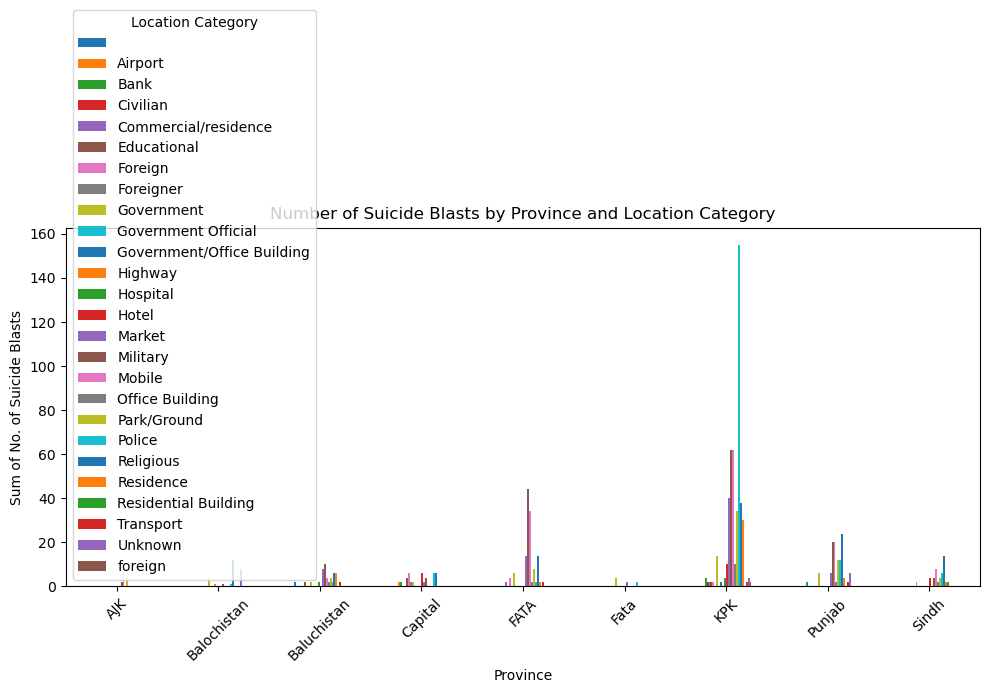

In [43]:
# Assuming your DataFrame is already loaded as Terrorist_attack

# Grouping by Province and Location Category, summing No. of Suicide Blasts
df_grouped = Terrorist_attack.groupby(['Province', 'Location Category'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

# Setting chart title and labels
plt.title('Number of Suicide Blasts by Province and Location Category')
plt.xlabel('Province')
plt.ylabel('Sum of No. of Suicide Blasts')

# Showing the legend and plot
plt.legend(title='Location Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

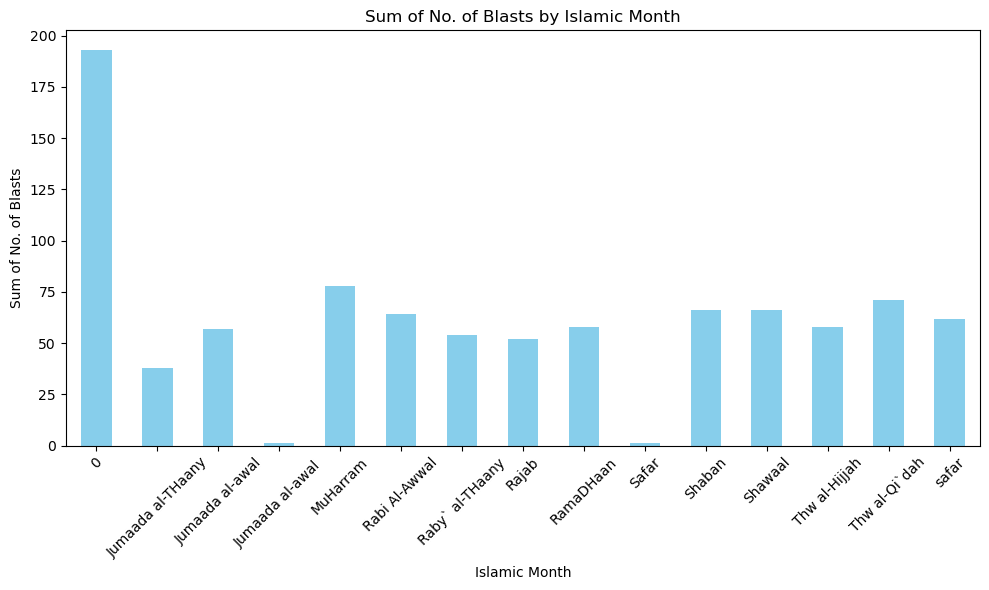

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is already loaded as Terrorist_attack

# Grouping by Islamic Month and summing the number of blasts
df_grouped = Terrorist_attack.groupby('Islamic Month')['No. of Suicide Blasts'].sum()

# Plotting the bar chart
df_grouped.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Setting chart title and labels
plt.title('Sum of No. of Blasts by Islamic Month')
plt.xlabel('Islamic Month')
plt.ylabel('Sum of No. of Blasts')

# Rotating the x-axis labels to improve readability
plt.xticks(rotation=45)

# Adjusting layout to avoid overlap
plt.tight_layout()

# Displaying the plot
plt.show()

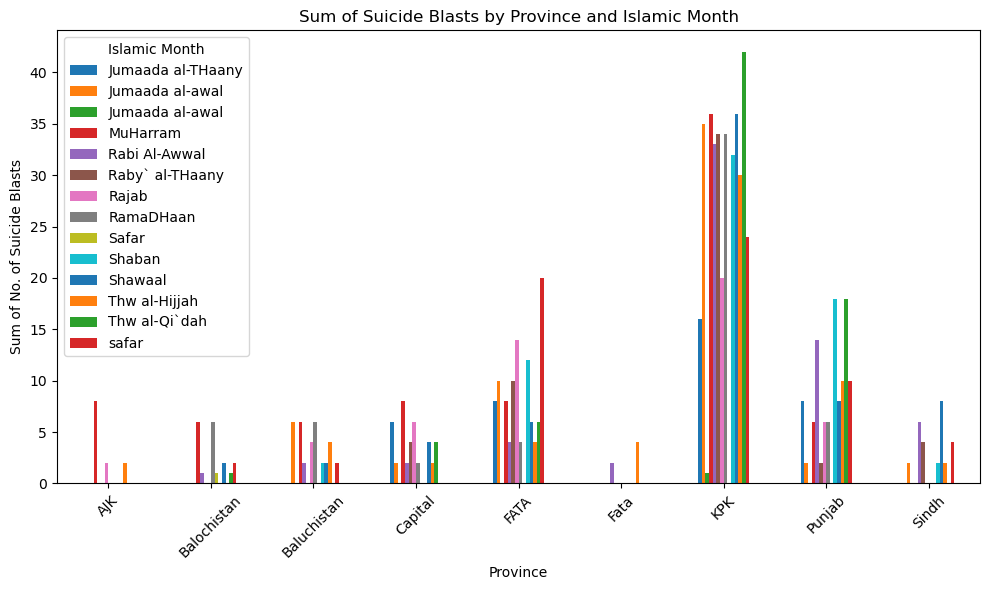

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is already loaded as Terrorist_attack

# Filtering out rows where Islamic Month is 0
filtered_df = Terrorist_attack[Terrorist_attack['Islamic Month'] != 0]

# Grouping by Province and Islamic Month, summing No. of Suicide Blasts
df_grouped = filtered_df.groupby(['Province', 'Islamic Month'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

# Setting chart title and labels
plt.title('Sum of Suicide Blasts by Province and Islamic Month')
plt.xlabel('Province')
plt.ylabel('Sum of No. of Suicide Blasts')

# Displaying the legend with Islamic Months
plt.legend(title='Islamic Month')
plt.xticks(rotation=45)

# Adjusting layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show()

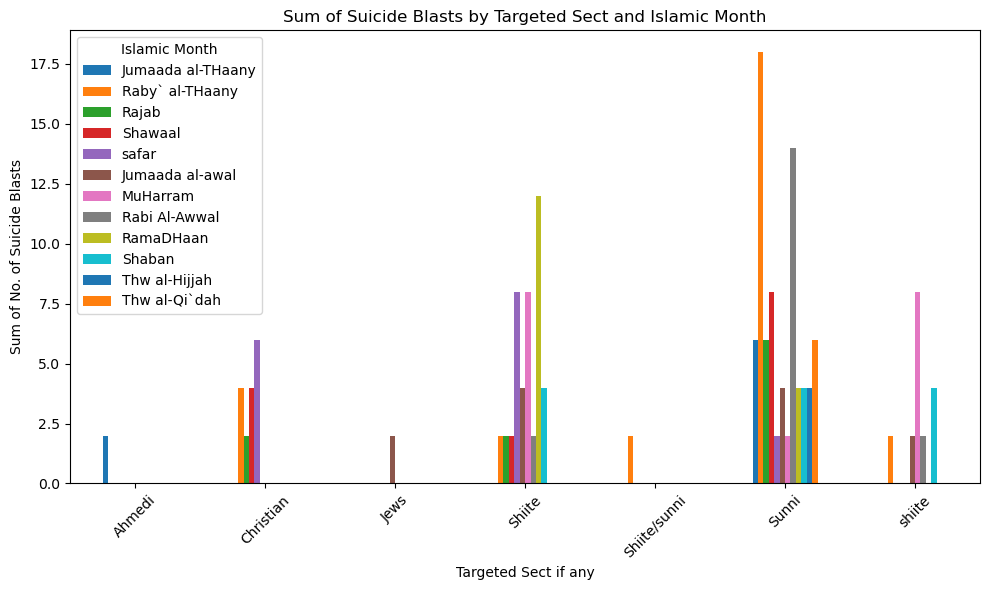

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is already loaded as Terrorist_attack

# Filtering out rows where Islamic Month is 0
filtered_df = Terrorist_attack[Terrorist_attack['Islamic Month'] != 0]

# Grouping by Targeted Sect and Islamic Month, summing No. of Suicide Blasts
df_grouped = filtered_df.groupby(['Targeted Sect if any', 'Islamic Month'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

# Setting chart title and labels
plt.title('Sum of Suicide Blasts by Targeted Sect and Islamic Month')
plt.xlabel('Targeted Sect if any')
plt.ylabel('Sum of No. of Suicide Blasts')

# Displaying the legend with Islamic Months
plt.legend(title='Islamic Month')
plt.xticks(rotation=45)

# Adjusting layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show()

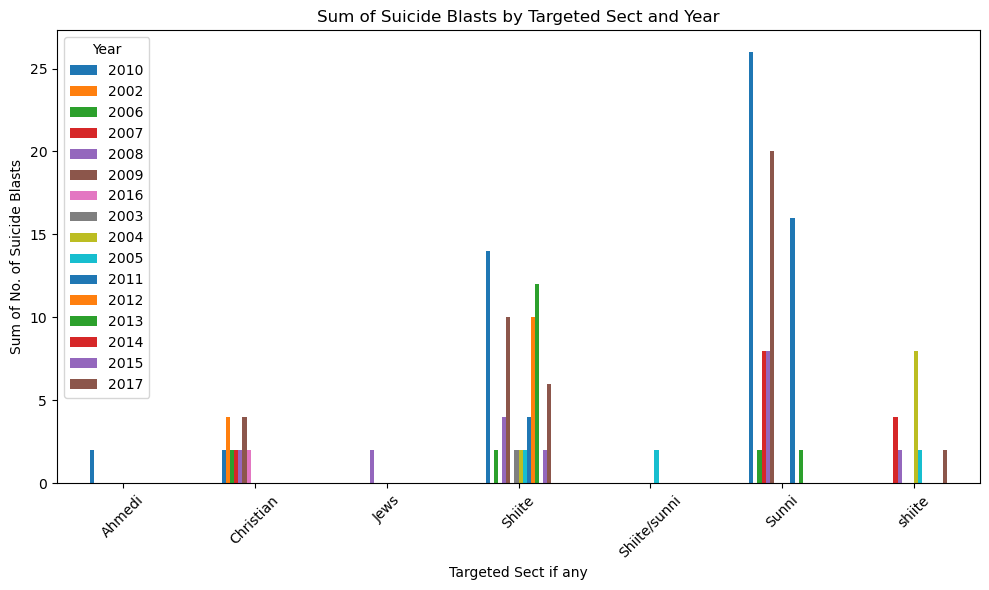

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is already loaded as Terrorist_attack

# Grouping by Targeted Sect and Year, summing No. of Suicide Blasts
df_grouped = Terrorist_attack.groupby(['Targeted Sect if any', 'Year'])['No. of Suicide Blasts'].sum().unstack()

# Plotting the bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

# Setting chart title and labels
plt.title('Sum of Suicide Blasts by Targeted Sect and Year')
plt.xlabel('Targeted Sect if any')
plt.ylabel('Sum of No. of Suicide Blasts')

# Displaying the legend with Year
plt.legend(title='Year')
plt.xticks(rotation=45)

# Adjusting layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show()

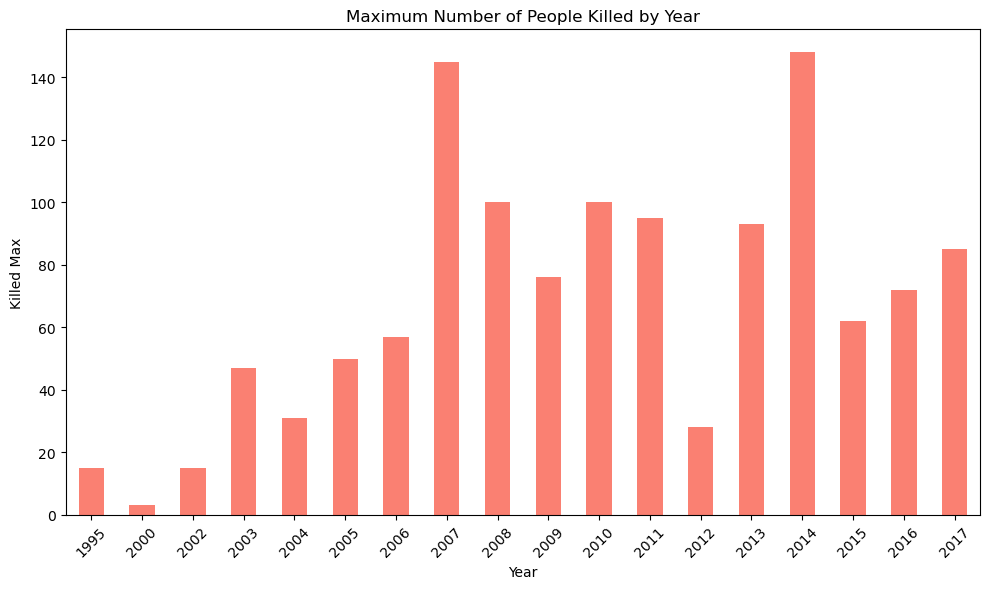

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is already loaded as Terrorist_attack

# Grouping by Year and calculating the max value of Killed Max
df_grouped = Terrorist_attack.groupby('Year')['Killed Max'].max()

# Plotting the bar chart
df_grouped.plot(kind='bar', figsize=(10, 6), color='salmon')

# Setting chart title and labels
plt.title('Maximum Number of People Killed by Year')
plt.xlabel('Year')
plt.ylabel('Killed Max')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adjusting layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show()

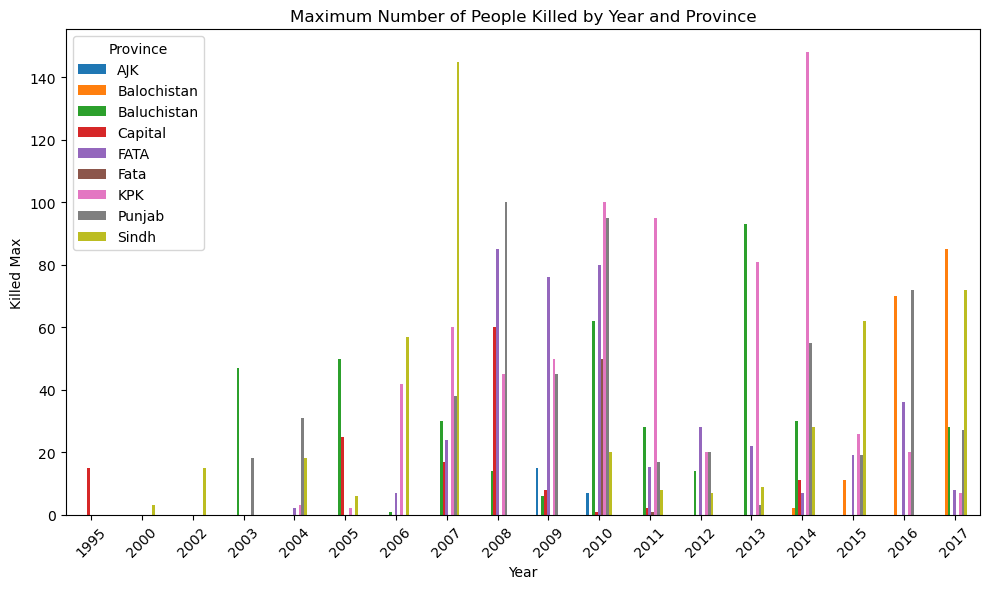

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is already loaded as Terrorist_attack

# Grouping by Year and Province, and calculating the max value of Killed Max
df_grouped = Terrorist_attack.groupby(['Year', 'Province'])['Killed Max'].max().unstack()

# Plotting the bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(10, 6))

# Setting chart title and labels
plt.title('Maximum Number of People Killed by Year and Province')
plt.xlabel('Year')
plt.ylabel('Killed Max')

# Displaying the legend with Provinces
plt.legend(title='Province')
plt.xticks(rotation=45)

# Adjusting layout to prevent overlap
plt.tight_layout()

# Showing the plot
plt.show()